<img src="http://sail.zpf.fer.hr/Fizika-laboratorij/moodle/logo2020.png" style="height: 70px;">


# Vježba 0: Uvod u statističku obradu mjerenja

U ovoj vježbi ćete proći osnovne pojmove vezane uz mjerenja i njihovu nesigurnost, u obimu koji je potreban za uspješno savladavanje laboratorijskih vježbi iz Fizike.

Kroz radnu bilježnicu ćete:
* računati srednju vrijednost, varijancu i varijancu srednje vrijednosti skupa mjerenja, 
* provjeriti vezu opisnih statistika i parametara normalne (Gaussove) raspodjele,
* računati očekivanu vrijednost i nesigurnost posredno mjerene fizikalne veličine,
* pomoću metode najmanjih kvadrata odrediti parametare linearnog modela i njihove nesigurnosti. 

Za referentni tekst odabrana je publikacija JCGM-a (Joint Committee for Guides in Metrology) JCGM 100:2008 Vrednovanje mjernih podataka -- Upute za iskazivanje mjerne nesigurnosti (http://www.dzm.hr/_download/repository/mjerna_nesigurnost.pdf). 



## Prije nego što počnete:

* Naredbe u ćeliji (koju ste odabrali) se izvršavaju pomoću **'Run'** gumba gore (▶︎) ili pomoću **'ctrl+Enter'**.
* Prije nego što krenete dalje s vježbom, izvršite sljedeću ćeliju i učitajte potrebne biblioteke.

## Što se od mene očekuje?

* **Sve UPUTE** pažljivo čitajte i slijedite. 
* **Kod** za koji piše da 'Izvršite bez izmjena' **NIJE potrebno čitati.**
* Samo na **nekoliko** označenih mjesta trebate upisivati svoj kod. Ostatak bilježnice je pripremljen.
* Prođite 8 zadataka i unesite tražena rješenja u test <a href="https://moodle.fer.hr/mod/quiz/view.php?id=11691"> Vježba 1 - Uvod u statističku obradu mjerenja</a> na moodle dijelu kolegija.
* U svom terminu 1. laboratorijske vježbe potražite pomoć od asistenata (ne brinite, svima se dogodi da ne mogu pronaći gdje je greška). Budite spremni pokazati i diskutirati rezultate s asistentima.

#### Učitajte potrebne biblioteke

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import random

---
# 1. Srednja vrijednost i nesigurnost *N* mjerenja

Uzmite da vam je zadatak izmjeriti neku fizikalnu veličinu $x$ te da ste napravili $N$ nezavisnih\* mjerenja te veličine $x_i$.

Iz mjerenih vrijednosti ćemo prvo izračunati dvije osnovne statistike\*\*: srednju vrijednost i varijancu skupa mjerenja. U drugom dijelu vidjet ćemo zašto se baš ove dvije mjere najčešće koriste i njihovu vezu s normalnom (Gaussovom) raspodjelom.

#### Srednja vrijednost  $\overline{x}$

Najčešće korištena mjera lokacije skupa podataka je **Srednja vrijednost** $\overline{x}$. Za $N$ mjerenja $x_i$  dana je izrazom

$$ \overline{x} = \frac{1}{N}\sum_{i=1}^{N}x_i$$


#### Varijanca skupa mjerenja $s^2$

Jedna od osnovnih mjera raspršenja za skup podataka (raspršenje skupa podataka oko srednje vrijednosti ili neke druge mjere lokacije) je **varijanca $s^2$ skupa podataka** $x_i$, koja je dana izrazom:

$$ s^2 = \frac{1}{N-1}\sum_{i=1}^{N}(x_i-\overline{x} )^2 $$

#### Standardna devijacija skupa mjerenja $s$

Iako je varijanca osnovnija veličina, uz srednju vrijednost skupa podataka uobičajeno je napisati korijen varijance $s$ koji se naziva i **standardna devijacija skupa podataka**, jer: izražava se u istim jedinicama kao i mjerena veličina, jednostavnije se uspoređuje sa srednjom vrijednosti $\overline{x}$ i direktno je povezana s parametrom $\sigma$ normalne razdiobe, tj. standardnom devijacijom.

---
  \* Rezultat prethodnog mjerenja ne utječe na sljedeće mjerenje iste veličine.
  
  \*\* Statistika je bilo koja funkcija slučajnih varijabli uzorka. Odnose se samo na mjerenja, nije potrebno pretpostaviti model za mjerenu veličinu niti njezinu razdiobu.

### 1.1. U sljedeću ćeliju kopirajte* zadani skup mjerenja 

Svoj skup mjerenja pronaći ćete na **moodle** dijelu kolegija Fizika.  
* U dijelu **Uvodna laboratorijska vježba**, 
* otvorite test **Vjezba 1 - Uvod u statističku obradu mjerenja**, 
* otvorite prvi zadatak i dolje kopirajte zadane podatke.
---
  \* Kasnije ćemo podatke direktno učitavati. Sada želimo da vidite jednostavni primjer 'ručno' unesenih podataka.

In [3]:
# Kopirajte ovdje skup mjerenja koji vam je zadan
# mojiPodatci = np.array([ ..ovdje vaša lista brojeva, npr. 1,2,3,.. ])
mojiPodatci = np.array([ 15.301620202020203, 15.452286868686867, 15.405220202020203, 15.652320202020205, 15.38408686868687, 15.534920202020203,  
15.515286868686871, 15.473253535353535, 15.411020202020202, 15.619520202020203, 15.478320202020202, 15.530086868686867, 15.525553535353534, 15.5035202020202, 15.532753535353537, 15.525686868686869, 15.571953535353535, 15.425853535353536,  
15.423553535353536, 15.626853535353536, 15.388486868686869, 15.555720202020202, 15.399786868686867, 15.455553535353538, 15.562253535353536, 15.416253535353535, 15.456453535353536, 15.396553535353535, 15.607320202020201, 15.484353535353536   ])

### 1.2. Sada sami napišite funkciju i izračunajte srednju vrijednost svog skupa podataka

* Za račun srednje vrijednosti $ \overline{x} = \frac{1}{N}\sum_{i=1}^{N}x_i$ možete upotrijebiti dvije metode: 

     * **`len`** za broj mjerenja u skupu
     * **`sum`** za zbroj svih vrijednosti u skupu

In [4]:
# duljina liste:
len(mojiPodatci)

30

In [5]:
# zbroj svih mjerenja:
sum(mojiPodatci)

464.61640606060615

<div style =  "background-color:#cce698">
**Zadatak 1**: Izračunajte srednju vrijednost svog skupa podataka. Rezultat unesite u zadatak na moodle-u.
</div>

In [7]:
# Ovdje sami napišite funkciju i izračunajte srednju vrijednost svog skupa podataka
srednjaVrijednost = srednjaVrijednost = sum(mojiPodatci)/len(mojiPodatci)
srednjaVrijednost # ispišite vrijednost

15.487213535353538

### 1.3. Sami napišite funkciju i izračunajte varijancu svog skupa podataka

* Za račun varijance skupa  $ s^2 = \frac{1}{N-1}\sum_{i=1}^{N}(x_i-\overline{x} )^2 $  korisni će vam biti sljedeći primjeri računanja s numpy arrays: 

     * dodavanje/oduzimanje broja od np.array
     * računske operacije s dva np.array (u ovom slučaju množenje)

In [8]:
# Primjer: dodavanje konstantne vrijednosti
mojiPodatci + 100.

array([115.3016202 , 115.45228687, 115.4052202 , 115.6523202 ,
       115.38408687, 115.5349202 , 115.51528687, 115.47325354,
       115.4110202 , 115.6195202 , 115.4783202 , 115.53008687,
       115.52555354, 115.5035202 , 115.53275354, 115.52568687,
       115.57195354, 115.42585354, 115.42355354, 115.62685354,
       115.38848687, 115.5557202 , 115.39978687, 115.45555354,
       115.56225354, 115.41625354, 115.45645354, 115.39655354,
       115.6073202 , 115.48435354])

In [9]:
# Primjer: množenje dva np.array
(mojiPodatci + 100.)*mojiPodatci

array([1764.30160101, 1784.00185634, 1777.84282967, 1810.22714791,
       1775.07881565, 1794.82576589, 1792.25281349, 1786.7469285 ,
       1778.60156387, 1805.92143154, 1787.41041648, 1794.19228502,
       1793.59816611, 1790.71115886, 1794.54178593, 1793.61563961,
       1799.68109044, 1780.54231083, 1780.24135719, 1806.88390495,
       1775.65421498, 1797.55245121, 1777.13212247, 1784.42948862,
       1798.40908863, 1779.2862266 , 1784.54730943, 1776.7092143 ,
       1804.32046409, 1788.20055794])

<div style =  "background-color:#cce698">
**Zadatak 2**: Izračunajte varijancu i standardnu devijaciju svog skupa podataka.
</div>

In [10]:
# Ovdje sami napišite funkciju i izračunajte varijancu svog skupa podataka
# Koristite prethodno izračunatu srednju vrijednost 'srednjaVrijednost', te oduzimanje broja od np.array, 
# množenje dva np.array i konačno sumu elemenata sum()
odstupanje = (mojiPodatci - srednjaVrijednost)
Varijanca = (sum(odstupanje*odstupanje))/(len(mojiPodatci)-1)
Varijanca

0.007100303938697341

In [11]:
# Izračunajte standardnu devijaciju skupa, korijen od x je np.sqrt(x):
StdDev = np.sqrt( Varijanca )
StdDev # ispišite vrijednost

0.08426330125681844

### 1.4. Provjerite:
* kako izgleda raspodjela vaših podataka 
* u kakvom su u odnosu s tom raspodjelom veličine koje ste upravo izračunali ('opisne statistike')

Ako niste mijenjali imena varijabli gore (mojiPodatci, srednjaVrijednost, Varijanca), **NIJE potrebno raditi izmjene** u donjoj ćeliji.

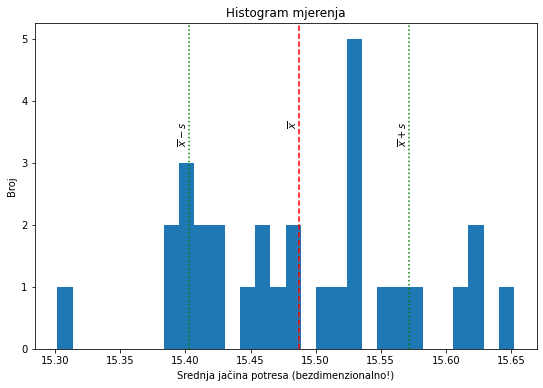

In [12]:
# IZVRŠITE BEZ IZMJENA -------------

broj_binova = 30
fig, ax = plt.subplots(figsize=(9,6))
x = mojiPodatci
n, bins, vals = ax.hist(x, broj_binova, density=False)
ax.set_xlabel('Srednja jačina potresa (bezdimenzionalno!)')
ax.set_ylabel('Broj')
ax.set_title('Histogram mjerenja')
ymin, ymax = ax.get_ylim()  # Granice y-osi
# lokacija srednje vrijednosti
ax.axvline(srednjaVrijednost, linestyle='dashed',color='red')
ax.text(srednjaVrijednost, ymax*0.7, r'$\overline{x}$',ha='right', va='top',rotation=90, size=10)
# mjera širine: korijen iz varijance
desno = srednjaVrijednost+np.sqrt(Varijanca)
ax.axvline(desno, linestyle='dotted',color='green')
ax.text(desno, ymax*0.7, r'$\overline{x}+s$',ha='right', va='top',rotation=90, size=10)
lijevo = srednjaVrijednost-np.sqrt(Varijanca)
ax.axvline(lijevo, linestyle='dotted',color='green')
ax.text(lijevo, ymax*0.7, r'$\overline{x}-s$',ha='right', va='top',rotation=90, size=10)
plt.show()
plt.close(fig)

### 1.5. Varijanca srednje vrijednosti i zapis rezultata mjerenja

Povećavanjem broja nezavisnih mjerenja neće se bitno mijenjati rasipanje (širina) skupa podataka, 
ali će srednja vrijednost biti sve bolje određena. Nesigurnost određivanja srednje vrijednosti veličine koju smo 
mjerili više puta zovemo **varijanca srednje 
vrijednosti skupa mjerenja** $s^2(\overline{x})$:

$$ s^2 (\overline{x}) 
= \frac{s^2}{N}
= \frac{1}{N(N-1)}\sum_{i=1}^{N}(x_i-\overline{x} )^2
$$

Kao i za varijancu skupa podataka,
s rezultatom se obično daje **standradna devijacija srednje vrijednosti $s (\overline{x}) $**, koja je korijen varijance srednje vrijednosti.


### 1.6. Za direktno mjerene veličine određene iz niza mjerenja, na laboratorijskim vježbama će vaš rezultat biti zapisan:

$x_\mathrm{mjer.} = (\overline{x} \pm s(\overline{x}))$  [mjerna jedinica] ,

gdje je $s(\overline{x}) = \sqrt{\mathrm{varijanca}(\overline{x})}$, a $\overline{x}$ i $s_x$ moraju biti zaokruženi do druge značajne znamenke od $s_x$.

<br>
<div style =  "background-color:#cce698">
**Zadatak 3**: Prema gornjim uputama izračunajte i zapišite (na papir ili ovu radnu bilježnicu) rezultat za zadani skup mjerenja.
</div>

In [13]:
# Izračunajte standardnu devijaciju srednje vrijednosti, korijen od x je np.sqrt(x):
StdDevSrednje = np.sqrt(Varijanca/len(mojiPodatci))
StdDevSrednje # ispišite vrijednost

0.015384303622737626

---
# 2. Normalna (Gaussova) raspodjela

Da bi razumjeli izraze koje smo u prethodnom poglavlju koristili i brojeve koje smo dobili, kao polaznu točku koristimo model vjerojatnosti u klasičnoj interpretaciji ponavljanja mjerenja, gdje se smatra da je skup mjerenja uzorak uzet iz neke raspodjele. 

Ako varijabla $t$ ima normalnu raspodjelu s parametrima $\mu$ i $\sigma$, gustoća vjerojatnosti (vjerojatnost poprimanja određene vrijednosti $t$) je dana izrazom

$$p(t) = \frac{1}{\sigma\sqrt{2 \pi}}\exp\left[-\frac{1}{2}\left(\frac{t-\mu}{\sigma}\right)^2\right]$$

gdje vrijedi $\int p(t)dt = 1$.

Mjerne nesigurnosti često slijede normalnu raspodjelu, jer nastaju kao rezultat male promjene većeg broja nasumičnih varijabli.


### 2.1. Učitajte skup mjerenja\*  

Poveznicu na svoj skup mjerenja ćete pronaći u drugom zadatku na moodle testu. Poveznicu ili kopirajte ili samo očitajte i promijenite zadnji broj u imenu skupa podataka.


\* Podatci su prosječne jačine potresa na jednoj lokaciji u 50 dana. Izvor podataka: US Geological Survey

In [16]:
# Ovdje kopirajte poveznicu s Vašim skupom podataka. 
# Poveznica je zadana u drugom zadatku na moodle dijelu kolegija.
# Napomena: promjena je samo u zadnjem broju u imenu datoteke
fname = "http://sail.zpf.fer.hr/Fizika-laboratorij/moodle/Zad4-podaci/Zad4-skup5.txt"

# dalje IZVRŠITE BEZ IZMJENA -------------
dataTablica = pd.read_csv(fname, delim_whitespace=True, header=None, names=['magnituda'],
                         skipinitialspace=True, comment='#', error_bad_lines=False)
dataTablica.head() # ispisujemo samo prvih 5 vrijednosti, da provjerimo je li učitavanje uspješno

,magnituda
0,1.385847
1,1.537540
2,1.554878
3,1.527648
4,1.271002


In [17]:
# provjerimo koliko podataka ima u skupu
len(dataTablica)

2000

<div style =  "background-color:#cce698">
**Zadatak 4**: Izračunajte srednju vrijednost i varijancu ovog skupa podataka.
<br><br>
Srednja vrijednost: $\overline{x} = \frac{1}{N}\sum_{i=1}^{N}x_i$,  varijanca:  $ s^2 = \frac{1}{N-1}\sum_{i=1}^{N}(x_i-\overline{x} )^2 $.
</div>

Koristite izraze analogne onima koje ste napisali za prethodni skup podataka.

Kolona s mjerenjima `dataTablica.magnituda` je u sljedećoj ćeliji pridružena varijabli `x`, pa dalje možete računati s `x`.

In [19]:
x = dataTablica.magnituda # kolona s podatcima, racunajte dalje s x
skupSrednja = sum(x)/len(x)
skupSrednja

1.3595351737720458

In [20]:
skupVarijanca = sum((x-skupSrednja) * (x-skupSrednja)) / (len(x) - 1)
skupVarijanca

0.01630755570737256

In [21]:
# izvršite bez izmjene
np.sqrt(skupVarijanca) # standardna devijacija

0.12770104035352478

### 2.2. Nacrtajte histogram učitanih podataka

Na isti plot je dodana normalna raspodjela s lokacijom (srednja vrijednost $\mu$) i širinom (standardna devijacija $\sigma$) određenima iz skupa podataka tako da je
* za očekivanu vrijednost normalne raspodjele $\mu$ uzeta srednja vrijednost skupa podataka $\overline{x}$
* za standardnu devijaciju normalne raspodjele $\sigma$ uzet je korijen varijance skupa podataka $s$ (standardna devijacija skupa).

### Uočite: Podatci prilično dobro slijede pretpostavljenu normalnu raspodjelu!

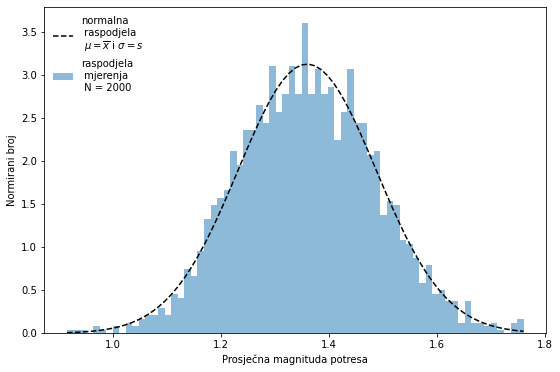

srednja vrijednost =  1.3595351737720458   standardna devijacija =  0.12770104035352478


In [22]:
# IZVRŠITE BEZ IZMJENA -------------

broj_binova = 70
fig, ax = plt.subplots(figsize=(9,6))
x = dataTablica.magnituda  # podatci
histoALL, binsALL, patches = ax.hist(x, broj_binova, density=True, label='raspodjela\n mjerenja\n N = %d'%(len(x)), alpha=0.5, zorder=1)
# pretpostavimo normalnu raspodjelu s parametrima: mu = srednji(x), sigma=s
mu = skupSrednja; sigma = np.sqrt(skupVarijanca)
y = scipy.stats.norm.pdf(binsALL, mu, sigma)
ax.plot(binsALL, y, '--', label='normalna\n raspodjela\n $\mu = \overline{x}$ i $\sigma=s$',color='black')
ax.set_xlabel('Prosječna magnituda potresa')
ax.set_ylabel('Normirani broj')
ax.legend(loc='upper left', framealpha=0)
plt.show()
plt.close(fig)
print("srednja vrijednost = ", mu,"  standardna devijacija = ", sigma)

### 2.3. Sada iz istog skupa podataka nasumično odaberite manje skupove podataka.

<div style =  "background-color:#cce698">
**Zadatak 5**: Provjerite kako izgledaju raspodjele manjih pod-skupova ovih podataka.
</div>
<br>
* **PROMIJENITE** dolje broj za: **VelicinaNasumicnoOdabranogUzorka** 

* Probajte **sve** odabire od: **20, 50, 100, 300, 1000** podataka. Za svaki od tih odabira, ćeliju možete izvršiti nekoliko puta da vidite kako se rezultat mijenja s nasumičnim odabirom iz skupa.

* Primjetite kada (za koje veličine odabranog podskupa) histogram počinje ličiti na Gaussovu raspodjelu.

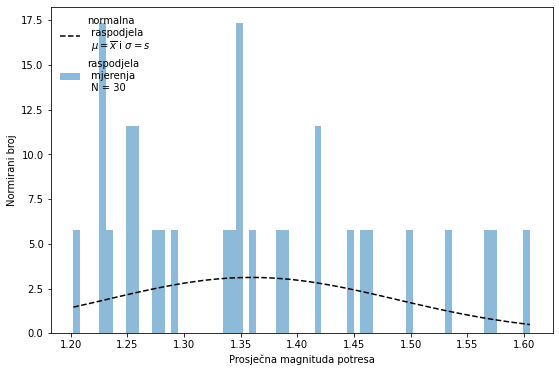

In [23]:
VelicinaNasumicnoOdabranogUzorka = 30

# DALJE IZVRŠITE BEZ IZMJENA -------------

fig, ax = plt.subplots(figsize=(9,6))
x = dataTablica.magnituda
x = np.random.choice(x,VelicinaNasumicnoOdabranogUzorka)
histo, bins, patches = ax.hist(x, broj_binova, density=True, label='raspodjela\n mjerenja\n N = %d'%(len(x)), alpha=0.5, zorder=1)
y = scipy.stats.norm.pdf(bins, mu, sigma)
ax.plot(bins, y, '--', label='normalna\n raspodjela\n $\mu = \overline{x}$ i $\sigma=s$',color='black')
ax.set_xlabel('Prosječna magnituda potresa')
ax.set_ylabel('Normirani broj')
ax.legend(loc='upper left', framealpha=0)
plt.show()
plt.close(fig)

#### Upravo ste vidjeli ilustraciju **Centralnog graničnog teorema** 

Centralni granični teorem kaže da će niz slučajnih varijabli $x_i, i=1,...,N$ konvergirati normalnoj razdiobi kada $N$ teži u beskonačno. (https://en.wikipedia.org/wiki/Central_limit_theorem)

### 2.4. Provjerite koliki udio skupa podataka ima vrijednost u intervalu $\mu - \sigma$  do  $\mu + \sigma$

In [24]:
# IZVRŠITE BEZ IZMJENA -------------

# S normiranim histogramom (površina je 1) je lako izračunati udio skupa u zadanom intervalu
bindolje = np.digitize(skupSrednja - np.sqrt(skupVarijanca),binsALL)
bingore  = np.digitize(skupSrednja + np.sqrt(skupVarijanca),binsALL)
print("binovi unutar kojih ćemo pobrojiti podatke: ",bindolje, " - ",bingore)
postotak = 100*np.sum(histoALL[bindolje:bingore] * np.diff(binsALL)[bindolje:bingore])
print("postotak podataka u zadanom intervalu = ",postotak)

binovi unutar kojih ćemo pobrojiti podatke:  27  -  48
postotak podataka u zadanom intervalu =  67.80000000000001


#### Pogledajmo kako izgleda taj interval na grafu (osjenčano zeleno).

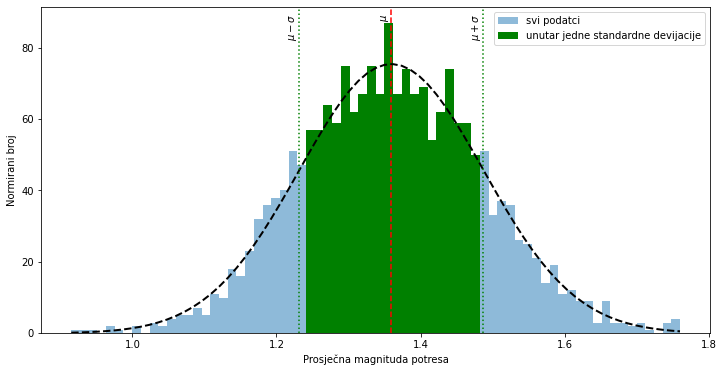

In [25]:
# IZVRŠITE BEZ IZMJENA -------------

fig, ax = plt.subplots(figsize=(12,6))
x = dataTablica.magnituda  # podatci 
histoALL, binsALL, patches = ax.hist(x, broj_binova, density=False,label='svi podatci',alpha=0.5)
# pretpostavimo normalnu raspodjelu s parametrima: mu = srednji(x), sigma=s
mu = skupSrednja ; sigma = np.sqrt(skupVarijanca)
normiranje = np.sum(histoALL * np.diff(binsALL))
y = normiranje*scipy.stats.norm.pdf(binsALL, mu, sigma)
ax.plot(binsALL, y, '--',color='black',lw=2)
ax.set_xlabel('Prosječna magnituda potresa')
ax.set_ylabel('Normirani broj')
ymin, ymax = ax.get_ylim()  # Granice y-osi:
# lokacija srednje vrijednosti
ax.axvline(mu, linestyle='dashed',color='red')
ax.text(mu, ymax*0.98, r'$\mu$',ha='right', va='top',rotation=90, size=10)
# mjera širine: korijen iz varijance
desno = mu+sigma
ax.axvline(desno, linestyle='dotted',color='green')
ax.text(desno, ymax*0.98, r'$\mu+\sigma$',ha='right', va='top',rotation=90, size=10)
lijevo = mu-sigma
ax.axvline(lijevo, linestyle='dotted',color='green')
ax.text(lijevo, ymax*0.98, r'$\mu-\sigma$',ha='right', va='top',rotation=90, size=10)
# Dodajmo i oznacene binove:
ax.hist(x, bins=binsALL[bindolje:bingore], density=False, label='unutar jedne standardne devijacije',color='green')
ax.legend(loc='upper right')
plt.show()
plt.close(fig)

#### Pronašli ste da se u intervalu vrijednosti   $\mu\pm\sigma$ nalazi $\sim 65-70\%$ skupa

Kada bi podatci točno slijedili normalnu raspodjelu s parametrima $\mu$ i $\sigma$, u intervalu 
* $(\mu-\sigma ,\mu+\sigma)$ nalazilo bi se **68.3%** podataka,
* $(\mu-2\sigma ,\mu+2\sigma)$ nalazilo bi se **95.4%** podataka,
* $(\mu-3\sigma ,\mu+3\sigma)$ nalazilo bi se **99.7%** podataka.

---
# 3. Mjerna nesigurnost posredno mjerene veličine

Često traženu veličinu $Y$ ne mjerimo direktno, već računamo iz poznate funkcijske ovisnosti $Y = f(X_1,...,X_n)$ o drugim veličinama $X_1,...,X_n$. Na primjer, volumen tijela (valjka) iz prve laboratorijske vježbe računa se iz izmjerene visine $h$ i promjera $d$:

$$V = h\pi \left(\frac{d}{2}\right)^2$$

#### Očekivana vrijednost
Očekivanu vrijednost tražene veličine $y$ izračunamo iz očekivanih vrijednosti ulaznih veličina $x_1,...,x_n$: $y = f(x_1,...,x_n)$.

U slučaju valjka, iz nekoliko mjerenja visine i promjera bi pronašli srednje vrijednosti $\overline{d}$ i $\overline{h}$ i njih smatrali očekivanim vrijednostima $d$ i $h$. Očekivani volumen bi izračunali pomoću tih vrijednosti.


#### Mjerna nesigurnost
Općenito jedna ili više tih drugih veličina $x_1,...,x_n$ imaju mjernu nesigurnost ($u (x_1),..., u(x_n)$), pa očekujemo da o preciznosti mjerenja ulaznih veličina ovisi preciznost konačnog rezultata. 

U slučaju valjka, nesigurnost mjerenja visine $u_h$ i promjera $u_d$ pronašli bi iz standardne devijacije srednje vrijednosti skupa mjerenja svake od tih veličina $u(d) = s(\overline{d})$ i $u(h) = s(\overline{h})$.

Kombinirana nesigurnost posredno mjerenje veličine $u (y)$ nalazi se pomoću izraza

$$u^2 (y) = \sum_{i=1}^n \left( \frac{\partial f}{\partial x_i} \right)^2 u^2 (x_i) 
\ \ \ ,\mathrm{gdje \ je} \ \ \ \  \ \ \ \ \ 
y = f(x_1,...,x_n) $$

<br>
<div style =  "background-color:#cce698">
**Zadatak 6**: Primjenite račun nesigurnosti na zadanu funkcijsku ovisnost volumena o promjeru i visini valjka, za mjerenja promjera i visine koja su Vam zadana u moodle*testu.
    
Za pomoć pogledajte Primjer 5 u skripti iz laboratorijskih vježbi.
</div>

Pri računu se koristite kalkulatorom ili ovom radnom bilježnicom (novu ćeliju za račun dodajete pomoću '+').

Zapišite (na papir ili u ovu radnu bilježnicu) konačni rezultat takvog posrednog mjerenja tražene veličine u standardnom obliku:
<br>
$y_\mathrm{mjer.} = (\overline{y} \pm u_y)$  [mjerna jedinica].


In [30]:
d = 5.565 
ud = 0.011
h = 10.672 
uh = 0.033
V = h * np.pi * d ** 2 / 4
var_V = V*V * ((uh / h) ** 2 + (2 * ud / d) ** 2)
std_V = np.sqrt(var_V)
V, var_V, std_V

(259.5768962459815, 1.697316004061646, 1.3028108090055308)

---
# 4. Linearni model i metoda najmanjih kvadrata


Uzmite da imate skup mjerenja dvije varijable (npr. vrijeme i položaj) $x_i$ i $y_i$, s $i=1,...,N$, gdje je $N$ broj mjerenja. 

Ako **pretpostavite** da je model za mjerenja linearna ovisnost $y$ o $x$: 
$$y(x_i) = a + b x_i ,$$ 
koeficijente pravca $a$ i $b$ možete pronaći zahtjevanjem da suma kvadrata odstupanja predviđenih vrijednosti $y(x_i)$ od mjerenih vrijednosti $y_i$ (vertikalnih udaljenosti točaka od pravca) bude najmanja moguća:

$$S^2 =\sum_{i=1}^N [y_i -y(x_i)]^2 = \sum_{i=1}^N [y_i - (a + b x_i)]^2 = \mathrm{minimum}$$

Koeficijenti pravca za koje je to zadovoljeno (minimiziraju S^2): 
$$\frac{\partial S^2}{\partial a} = 0\ \ \ \mathrm{i} \ \ \ \frac{\partial S^2}{\partial b} = 0$$


### 4.1. Koeficijenti pravca
Kada riješimo ovaj sustav od dvije jednadžbe s dvije nepoznanice, dobijemo izraze za koeficijente (dalje podrazumijevamo da su sve sume za $i=1,...,N$):

$$a = \frac{\sum x_i^2 \sum y_i - \sum x_i\sum x_i y_i}{N \sum x_i^2 - (\sum x_i)^2}
\ \ \ , \ \ \ \ \ \ 
b = \frac{N\sum x_i y_i - \sum x_i \sum y_i }{N \sum x_i^2 - (\sum x_i)^2}$$


<br>
<div style =  "background-color:#cce698">
**Zadatak 7**: Za zadane podatke ($x$ je vrijeme u sekundama, $y$ položaj u cm) izračunajte brzinu prilagodbom podataka na pravac metodom najmanjih kvadrata.
</div>

Svoj skup mjerenja pronaći ćete u svom moodle testu. 

U sljedeće dvije ćelije kopirajte zadane skupove $x$ i $y$ vrijednosti. 

In [31]:
# Ovdje kopirajte svoje podatke za x varijablu (vrijeme u s)
# x_mjerenja = np.array([ ])
x_mjerenja = np.array([2.0, 5.052631578947368, 8.105263157894736, 11.157894736842106,  

14.210526315789474, 17.263157894736842, 20.315789473684212, 23.36842105263158,  

26.42105263157895, 29.47368421052632, 32.526315789473685, 35.578947368421055,  

38.631578947368425, 41.684210526315795, 44.73684210526316, 47.78947368421053,  

50.8421052631579, 53.89473684210527, 56.94736842105264, 60.0  ])

In [32]:
# Ovdje kopirajte svoje podatke za y varijablu (položaj u cm)
# y_mjerenja = np.array([ ])
y_mjerenja = np.array([23.170635566074665, 30.919397777153048, 56.18797171680749, 75.06846626249494,  

87.42596153547822, 113.62209150478319, 123.74151339927076, 136.70234143621445,  

156.2752407349329, 207.81913627449828, 202.0458961823364, 226.38996296160232,  

231.02276276128893, 256.90063266200247, 267.82765090267367, 297.4947397640738,  

296.6216038415195, 333.87538131285027, 345.16614633095315, 371.4484851965213 ])

Pomoću prethodno izvedenih izraza
$$a = \frac{\sum x_i^2 \sum y_i - \sum x_i\sum x_i y_i}{N \sum x_i^2 - (\sum x_i)^2} \ ,
\ \ \ \ \ 
b = \frac{N\sum x_i y_i - \sum x_i \sum y_i }{N \sum x_i^2 - (\sum x_i)^2}$$

iz skupova podataka $x_i$ i $y_i$ izračunajte koeficijente pravca $a$ i $b$.

Kada se piše program za računanje koeficijenata, uobičajeno je uvesti pokrate:

$ \mathrm{Sx} \equiv \sum x_i$, $ \mathrm{Sy} \equiv \sum y_i$, $ \mathrm{Sxy} \equiv \sum x_i y_i$, $ \mathrm{Sx2} \equiv \sum x_i^2$, pa imamo:

$$a = \frac{\mathrm{Sx2}\cdot  \mathrm{Sy} - \mathrm{Sx} \cdot \mathrm{Sxy} }{N\cdot \mathrm{Sx2} - (\mathrm{Sx})^2}\ ,
\ \ \ \ \ \ \ \
b = \frac{N \cdot \mathrm{Sxy} - \mathrm{Sx} \cdot \mathrm{Sy} }{N\cdot \mathrm{Sx2} - (\mathrm{Sx})^2}$$

<div style =  "background-color:#cce698">
**Zadatak 7a**: Izračunajte koeficijente $a$ i $b$.
</div>

In [33]:
# Ovdje napišite izraze za računanje a i b
# Pri tome kao i prije možete koristiti funkcije 
# len(podatci), sum(podatci) i raditi računske operacije s
# arrays, npr.  (podatci1-podatci2), (podatci - 5.0), (podatci*50) itd.
# Dolje je već napisana pomoć za dvije pokrate (Sx2 i N).
Sx = sum(x_mjerenja)
Sy = sum(y_mjerenja)
Sxy = sum(x_mjerenja * y_mjerenja)
Sx2 = sum(x_mjerenja * x_mjerenja)
N = len(x_mjerenja)

In [34]:
# Ovdje izračunajte i ispišite koeficijente a i b
a = (Sx2 * Sy - Sx * Sxy) / (N * Sx2 - Sx**2)
b = (N * Sxy - Sx * Sy) / (N * Sx2 - Sx ** 2)
print("a = %f, b = %f"%(a, b))

a = 6.353802, b = 5.988145


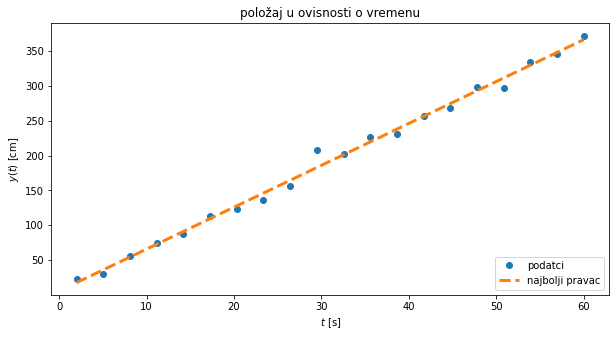

In [35]:
#  NISU POTREBNE IZMJENE ! -----------------------------

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_mjerenja,y_mjerenja,"o",label='podatci')  
ax.plot(x_mjerenja, a + b*x_mjerenja,
        "--",linewidth=3, label='najbolji pravac', zorder=10)  #pravac s dobivenim koeficijentima
ax.set(xlabel='$t$ [s]', ylabel='$y(t)$ [cm]',
       title='položaj u ovisnosti o vremenu')
ax.legend(loc='lower right')
plt.show()
plt.close(fig)

### 4.2. Nesigurnosti koeficijenata pravca

Čak i veličine koje teorijski imaju savršenu međusobnu linearnu ovisnost, će zbog nesigurnosti u mjerenju imati odstupanja od pravca. Nesigurnost u određivanju parametara $a$ i $b$ pomoću pravila za nesigurnost posredno mjerenih veličina:

$$ u_{a} = \sum_i u_i^2\left( \frac{\partial a}{\partial y_i} \right)^2, \ \ \ \
u_{b} = \sum_i u_i^2\left( \frac{\partial b}{\partial y_i} \right)^2 \ ,$$ 

gdje je $u_i$ mjerna nesigurnost $i-$tog mjerenja.  
Deriviranjem gornjih izraza za $a$ i $b$ po $y_i$ i sumiranjem po svim $i$ dobivamo izraze:

$$u_a^2 = s^2 \frac{\sum x_i^2}{N\sum x_i^2 -(\sum x_i)^2}\ ,
\ \ \ \ \ \ 
u_b^2 = s^2 \frac{N}{N\sum x_i^2 -(\sum x_i)^2} \ \ \ \ ,\mathrm{gdje\ je} 
\ \ \ \ \ \ 
s^2 = \frac{\sum_i (y_i - a - b x_i)^2}{N-2}.
$$

Ovi izrazi su napisani uz pretpostavke koje su detaljnije objašnjene u uvodnom poglavlju u skripti.

<br>
<div style =  "background-color:#cce698">
**Zadatak 7b**: Izračunajte nesigurnosti koeficijenata $u_a$ i $u_b$.
<br>Pomoć:
<br> --- Izraz za $s^2$ je već dolje napisan: $s^2 =$ `var2` .
<br> --- Nazivnici u izrazima za $u_a$ i $u_b$ jednaki su nazivnicima u izrazima za a i b koje ste već napisali.
<br>
</div>

In [37]:
# ---- !! POTREBNE SU IZMJENE !! -------------

# Ovdje je izračunata varijance mjerenja s^2 = var2:
zagrada = y_mjerenja - a - b*x_mjerenja
var2 = sum(zagrada*zagrada)/(N-2)

# Pomoću var2 i prethodno definiranih Sx, Sx2, N izračunajte kvadrate
# nesigurnosti koeficijenata pravca (var_a = u_a^2  i  var_b = u_b^2)
# HINT: Nazivnik je jednak nazivniku u izrazima za a i b koje ste već napisali
var_a = var2* Sx2 / (N * Sx2 - Sx**2)
var_b = var2* N / (N * Sx2 - Sx ** 2)

# DALJE NISU POTREBNE IZMJENE -------------

u_a = np.sqrt(var_a)
u_b = np.sqrt(var_b)

# Ispišite vrijednosti za nesigurnost parametara a i b:
print("u_a = %f, u_b = %f"%(u_a, u_b))
# i ponovo parametre a i b:
print("a = %f, b = %f"%(a, b))

u_a = 3.875548, u_b = 0.108714
a = 6.353802, b = 5.988145


Ovo je vrijednost koju ste dobili za mjeru rasipanja $y_i$ vrijednosti oko pravca:

In [38]:
#  NISU POTREBNE IZMJENE ! -----------------------------
np.sqrt(var2)

8.558006044058876

### 4.2. Možemo još provjeriti je li naša pretpostavka da odstupanja od pravca slijede normalnu raspodjelu dovoljno dobra
Nacrtati ćemo 
* raspodjelu odstupanja mjerenih $y_i$ vrijednosti od pravca:    $\,\,\, y_i - (a+b\cdot x_i)$
* normalnu raspodjelu s lokacijom $\mu=0$ i širinom $\sigma=s$

($\mu=0$ označava da očekujemo sličnu količinu ukupnog odstupanja ispod i iznad pravca. $\sigma=s$ označava da vrijednost $s$ mjeri širinu rasipanja oko pravca.)

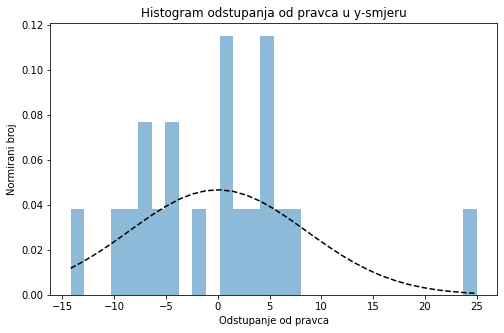

In [39]:
#  NISU POTREBNE IZMJENE ! -----------------------------
broj_binova = 30
fig, ax = plt.subplots(figsize=(8,5))
odstupanja = y_mjerenja - a - b*x_mjerenja
n, bins, patches = ax.hist(odstupanja, broj_binova, density=True, alpha=0.5, zorder=1)
y = scipy.stats.norm.pdf(bins, 0, np.sqrt(var2))
ax.plot(bins, y, '--',color='black')
ax.set_xlabel('Odstupanje od pravca')
ax.set_ylabel('Normirani broj')
ax.set_title(r'Histogram odstupanja od pravca u y-smjeru')
plt.show()
plt.close(fig)

---
# 5. Provjera valjanosti modela, drugi modeli (osim linearnog)

**AKO** model dobro opisuje točke, moralo bi vrijediti:

* **U prosjeku** svaka točka $y_i$ od krivulje $y = f(x_i)$ odstupa (vertikalna udaljenost!) u iznosu svoje mjerne nesigurnosti $u_i$, koju je potrebno procjeniti za sve točke (npr. iz rezolucije instrumenta ili kao standardnu devijaciju ponovljenih mjerenja). 
*     Dakle, omjer odstupanja i nesigurnosti $[y(x_i) - y_i]/u_i$ ne bi smio biti (puno) veći od 1 za svaku točku.
*     Kada se zbroje kvadrati (da svaka bude pozitivna veličina) ovih omjera odstupanja, rezultat ne bi smio biti puno veći od broja točaka $N$.
*     Uvodi se suma (čita se hi-kvadrat): $$\chi^2 = \sum_{i=1}^N\left( \frac{ a + b x_i + c x_i^2 - y_i}{u_i}\right)^2$$ 
*     Dodavanjem slobodnih parametara (npr. povećanjem stupnja polinoma) u principu bi mogli provući krivulju kroz svaku točku, zato uspoređujemo $\chi^2$ s **brojem stupnjeva slobode** (eng. degrees of freedom), **d.o.f.**: $$d.o.f. = N -k,$$ gdje je $k$ broj parametara krivulje. Za linearnu funkcijsku ovisnost  $k = 2$ (parametri su odsječak i nagib pravca), za polinom drugog stupnja $k = 3$, itd. 
*     Uobičajeno je **REDUCIRANI hi-kvadrat**: $$\chi_{red}^2 = \chi^2 /d.o.f.$$ **uspoređivati s 1** i grubo pravilo je:
        * $\chi_{red}^2 \gg 1$ -- model nije prihvatljiv opis točaka ili su nesigurnosti podcijenjene
        * $\chi_{red}^2 \lesssim 1$ -- model je prihvatljiv opis točaka
        * $\chi_{red}^2 \ll 1$ -- model previše dobro opisuje točke, moguće je da treba smanjiti broj slobodnih parametara ili su mjerne nesigurnosti precijenjene.
        
            
Do sada smo koristili izraze iz uvodnog poglavlja skripte pomoću kojih se 'ručno' mogu izračunati parametri $a$ i $b$ i njihove nesiguronosti $u_a$ i $u_b$ za linearni model i prilagodbu metodom najmanjih kvadrata. Dalje ćemo koristiti `polyfit`, jednu od mnogih metoda koje postoje na raspolaganju u `numpy` i usporediti linerani i kvadratični model za skup mjerenja gibanja kolica na vježbi 2.2.

Učitajte skup mjerenja vremena i položaja kolica u laboratoriju. Nesigurnost mjerenja položaja procijenjena je na 200 jedinica koje mjeri arduino, što preračunavamo u (200*0.034/2) cm.

In [40]:
#  NISU POTREBNE IZMJENE ! -----------------------------
prefix = "http://sail.zpf.fer.hr/"
#prefix = ""
fname = prefix+"Fizika-laboratorij/mozda_kvadratno1.txt"
tabl5_1 = pd.read_csv(fname, delim_whitespace=True, header=None, names=['t','x'],
                         skipinitialspace=True, comment='#', error_bad_lines=False,skiprows=1)
tabl5_1.head() # ispisujemo samo prvih 5 vrijednosti, da provjerimo da li je učitavanje uspješno

,t,x
438,4.018459,14.535
439,4.018862,14.841
440,4.051589,14.739
441,4.052070,15.045
442,4.084673,15.759


### 5.1. Možemo li mjerenja opisati linearnom ovisnošću prijeđenog puta o vremenu (pravcem)?

Provjerimo kako mjerenja opisuje model $y(x_i) = a + b x_i$.

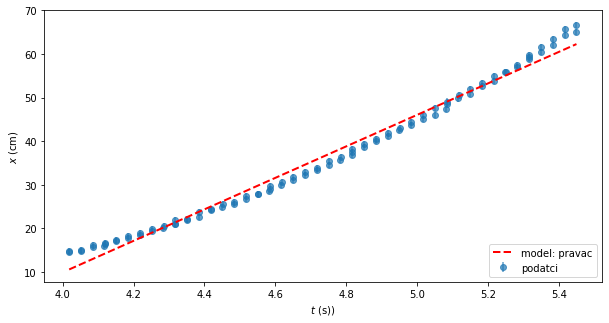

koeficijent uz x =  36.1266405667615  ±  0.4637008934401274
odsječak         =  -134.599096494231  ±  2.202840141549774
chi2/d.o.f.= 7.471905573125023


In [41]:
#  NISU POTREBNE IZMJENE ! -----------------------------
u_y = (200*0.034/2.)/np.sqrt(24) # Arduino vrijednost=100, pretvorena u cm, pretpostavka uniformne raspodjele
StupanjPolinoma = 1
x = np.array(tabl5_1.t)
y = np.array(tabl5_1.x)
par1, kov1 = np.polyfit(x, y, StupanjPolinoma, cov=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(x,y,yerr=u_y,fmt="o",label='podatci',alpha=0.7)
polinom = np.poly1d(par1)
ax.plot(x,polinom(x),"--",linewidth=2, color='red',label='model: pravac', zorder=10)
ax.set(xlabel='$t$ (s))', ylabel='$x$ (cm)',title='')
ax.legend(loc='lower right')
plt.show()
plt.close(fig)
print("koeficijent uz x = ",par1[0]," ± ",  np.sqrt(kov1[0][0]))
print("odsječak         = ",par1[1]," ± ",  np.sqrt(kov1[1][1]))
chi2_red = sum(((polinom(x) - y)/u_y)**2)/(len(x)-StupanjPolinoma-1)
print("chi2/d.o.f.=",chi2_red)

<div style =  "background-color:#cce698">
**Zadatak 8a**: Što zaključujete o modelu linearne ovisnosti $y$ o $x$ na temelju gornjeg grafa i $\chi^2_{red}$?
</div>

--> Već je okom vidljivo da to nije dobar model, a reducirani $\chi^2$ puno veći od 1 nam daje numeričku vrijednost na kojoj možemo temeljiti ovaj zaključak.

### 5.2. Možemo li mjerenja opisati kvadratnom ovisnošću prijeđenog puta o vremenu (parabola, tj. polinom drugog stupnja)?

Provjerimo kako model $y(x_i) = a + b x_i + c x_i^2$ opisuje mjerenja.

<div style =  "background-color:#cce698">
**Zadatak 8b**: Provjerite koliko dobro parabola opisuje mjerenja. Ima li poboljšanja u odnosu na pravac?
</div>

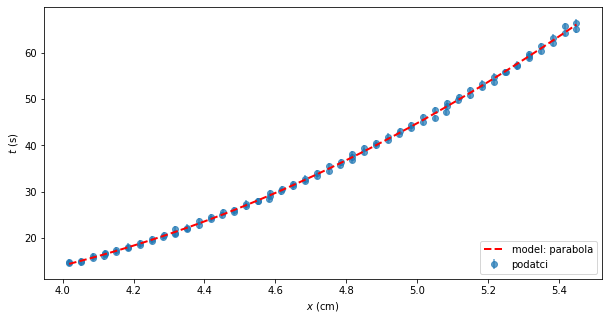

koeficijent uz x**2 =  11.526587192591322  ±  0.28703788732601987
koeficijent uz x    =  -72.97127986468576  ±  2.7189192493037084
odsječak            =  121.49848713960534  ±  6.3979169883597855
chi2/d.o.f.= 0.4035106508310531


In [42]:
#  NISU POTREBNE IZMJENE ! -----------------------------
StupanjPolinoma = 2
x = np.array(tabl5_1.t)
y = np.array(tabl5_1.x)
par1, kov1 = np.polyfit(x, y, StupanjPolinoma, cov=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(x,y,yerr=u_y,fmt="o",label='podatci',alpha=0.7)
polinom = np.poly1d(par1)
ax.plot(x,polinom(x),"--",linewidth=2, label='model: parabola', zorder=10,color='red')
ax.set(ylabel='$t$ (s)',
    xlabel='$x$ (cm)',
    title='')
ax.legend(loc='lower right')
plt.show()
plt.close(fig)
print("koeficijent uz x**2 = ",par1[0]," ± ",  np.sqrt(kov1[0][0]))
print("koeficijent uz x    = ",par1[1]," ± ",  np.sqrt(kov1[1][1]))
print("odsječak            = ",par1[2]," ± ",  np.sqrt(kov1[2][2]))
chi2_red = sum(((polinom(x) - y)/u_y)**2)/(len(x)-StupanjPolinoma-1)
print("chi2/d.o.f.=",chi2_red)

--> Okom je vidljivo da to prilično dobar model.

--> Da li dobivena vrijednost reduciranog $\chi^2$ opravdava uvođenje još jednog parametra, odnosno povećanje stupnja polinoma za funkciju prilagodbe?